In [ ]:
# Remember to upload optipaw_FINAL.csv

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Set options to display all unique values
# pd.set_option('display.max_rows', None)  # Display all rows
# pd.set_option('display.max_columns', None)  # Display all columns

# Load Optipaw Data
optipaw_data = pd.read_csv('optipaw_FINAL.csv')

# Extract rows where the 'State' column is 'Austin'
austin_data = optipaw_data[optipaw_data['State'] == 'Austin'].copy()

# Reset the index for the Austin data (optional but useful for clean DataFrames)
austin_data.reset_index(drop=True, inplace=True)

# Display the first few rows of the extracted data
print(austin_data.head())

  Animal.ID    Name Animal.Type                        Breed            Sex  \
0   A006100   Scamp         Dog         Spinone Italiano Mix  Neutered Male   
1   A006100   Scamp         Dog         Spinone Italiano Mix  Neutered Male   
2   A047759    Oreo         Dog                    Dachshund  Neutered Male   
3   A134067  Bandit         Dog            Shetland Sheepdog  Neutered Male   
4   A141142  Bettie         Dog  Labrador Retriever/Pit Bull  Spayed Female   

          Color   Age      Intake.Type     Outcome.Type          Intake.Date  \
0  Yellow/White   7.0    Public Assist  Return to Owner  2014-12-19 10:21:00   
1  Yellow/White   6.0    Public Assist  Return to Owner  2014-03-07 14:26:00   
2      Tricolor  10.0  Owner Surrender         Transfer  2014-04-02 15:55:00   
3   Brown/White  16.0    Public Assist  Return to Owner  2013-11-16 09:02:00   
4   Black/White  15.0            Stray  Return to Owner  2013-11-16 14:46:00   

          Outcome.Date   State  
0  2014-12-

In [ ]:
# Preprocessing Function for ML
def preprocessing(df, name_mapping_var=None):

  # For Name, we will use label encoding to assign each unique name a specific int, at the same time return the mapping
  # Strip leading asterisks from the Name column
  df['Name'] = df['Name'].str.lstrip('*')
  label_encoder = LabelEncoder()
  df['Name'] = label_encoder.fit_transform(df['Name'].astype(str))

  # If the user provided a variable to store the mapping, assign it
  if name_mapping_var is not None:
      name_mapping = {k: v for v, k in enumerate(label_encoder.classes_)}
      name_mapping_var.update(name_mapping)


  # For Animal.Type we will map Int Values to the specific animal type
  animal_mapping = {
    "Dog": 1, "Cat": 2, "Other": 3, "Bird": 4, "Livestock": 5,
    "House Rabbit": 6, "Rat": 7, "Ferret": 8, "Pig": 9, "Hamster": 10,
    "Guinea Pig": 11, "Gerbil": 12, "Hedgehog": 13, "Chinchilla": 14,
    "Goat": 15, "Mouse": 16, "Sugar Glider": 17, "Snake": 18,
    "Wildlife": 19, "Lizard": 20
    }

  df['Animal.Type'] = df['Animal.Type'].map(animal_mapping)

  # For Breed we will perform one hot encoding onto it
  # Remove parentheses and their contents, and replace '/' with space
  df['Breed'] = df['Breed'].str.replace(r'\(.*?\)', '', regex=True).str.replace('/', ' ').str.replace(',', ' ')

  # Split the 'Breed' column into a list and capitalize the first letter of each word
  df['Breed'] = df['Breed'].str.split().apply(lambda breeds: [breed.rstrip('-').capitalize() for breed in breeds])

  # Create dummy variables for each unique breed
  df_breeds = df['Breed'].str.join(' ').str.get_dummies(sep=' ')

  # Concatenate the original dataframe with the one-hot encoded breed dataframe
  df = pd.concat([df, df_breeds], axis=1)

  # Drop the original 'Breed' column
  df = df.drop(columns=['Breed'])

  # For Sex we will map Int Values to specific Sex
  sex_mapping = {'Neutered Male': 1, 'Spayed Female': 2, 'Intact Female': 3, 'Intact Male': 4, 'Unknown': 5, 'Female': 6, 'Male': 7}

  # Map the Sex column using the defined mapping
  df['Sex'] = df['Sex'].map(sex_mapping)

  # For colours, we will split into individual colours and use one hot encoding, which is assigning binary values to it

  # Split the 'Color' column by '/', 'and', and ','
  df['Color'] = df['Color'].str.replace('/', ' ').str.replace('and', ' ').str.replace(',', ' ').str.replace(r'-\b', '', regex=True)

  # Split the 'Color' column into a list and capitalize the first letter of each word
  df['Color'] = df['Color'].str.split().apply(lambda colors: [color.capitalize() for color in colors])

  # Create dummy variables for each unique color
  df_colors = df['Color'].str.join(' ').str.get_dummies(sep=' ')

  # Concatenate the original dataframe with the one-hot encoded color dataframe
  df = pd.concat([df, df_colors], axis=1)

  # Drop the original 'Color' column
  df = df.drop(columns=['Color'])

  # For Age, we will just store it as int and impute it with 0 if it is null, and store it as float
  df['Age'] = df['Age'].fillna(0).astype(float)

  # For Intake.Type, we will map Int Values to specific Intake
  intake_type_mapping = {
      'Public Assist': 1, 'Owner Surrender': 2, 'Stray': 3, 'Euthanasia Request': 4,
      'Abandoned': 5, 'Wildlife': 6, 'Moving': 7, 'Incompatible with owner lifestyle': 8,
      'Rabies Monitoring': 9, 'Marriage/Relationship split': 10, 'Owner Deceased': 11, 'Police Assist': 12,
      'Biting': 13, 'Owner Died': 14, 'TNR - Trap/Neuter/Release': 15, 'Unable to Afford': 16,
      'Unsuitable Accommodation': 17, 'Allergies': 18, 'Transfer from Other Shelter': 19,
      'Born in Shelter': 20, 'Landlord issues': 21, 'Litter relinquishment': 22, 'Sick/Injured': 23,
      'Owner requested Euthanasia': 24, 'Abuse/ neglect': 25, 'Incompatible with other pets': 26,
      'Behavioral Issues': 27, 'DOA': 28
  }

  # Map the Intake.Type column using the defined mapping
  df['Intake.Type'] = df['Intake.Type'].map(intake_type_mapping)

  # For Outcome.Type, we will map Int Values to specific Outcome
  outcome_type_mapping = {
      'Return to Owner': 1, 'Transfer': 2, 'Adoption': 3, 'Euthanasia': 4,
      'Died': 5, 'Rto-Adopt': 6, 'Disposal': 7, 'Missing': 8,
      'Stolen': 9, 'Relocate': 10, 'Lost': 11, 'Foster': 12,
      'Reclaimed': 13, 'Escaped': 14, 'Released To Wild': 15
  }

  # Map the Outcome.Type column using the defined mapping
  df['Outcome.Type'] = df['Outcome.Type'].map(outcome_type_mapping)

  # For Date and Time, we will be using panda and numpy date conversion

  # Convert Intake.Date and Outcome.Date to datetime format
  df['Intake.Date'] = pd.to_datetime(df['Intake.Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
  df['Outcome.Date'] = pd.to_datetime(df['Outcome.Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


  # Extract date components from the date columns
  df['Intake.Day'] = df['Intake.Date'].dt.day.fillna(0).astype(int)
  df['Intake.Month'] = df['Intake.Date'].dt.month.fillna(0).astype(int)
  df['Intake.Year'] = df['Intake.Date'].dt.year.fillna(0).astype(int)

  df['Outcome.Day'] = df['Outcome.Date'].dt.day.fillna(0).astype(int)
  df['Outcome.Month'] = df['Outcome.Date'].dt.month.fillna(0).astype(int)
  df['Outcome.Year'] = df['Outcome.Date'].dt.year.fillna(0).astype(int)

  # Extract and convert the hour to radians
  df['Intake.Hour'] = df['Intake.Date'].dt.hour.fillna(0).astype(int)
  df['Outcome.Hour'] = df['Outcome.Date'].dt.hour.fillna(0).astype(int)

  df['Intake.Hour.Radians'] = (df['Intake.Hour'] / 24) * 2 * np.pi
  df['Outcome.Hour.Radians'] = (df['Outcome.Hour'] / 24) * 2 * np.pi

  # Drop original date columns if no longer needed
  df = df.drop(columns=['Intake.Date', 'Outcome.Date'])

  return df

# Process Austin Dataset (Animal ID and State to be removed later)
austin_data = preprocessing(austin_data)

print(austin_data.head())


  Animal.ID   Name  Animal.Type  Sex   Age  Intake.Type  Outcome.Type   State  \
0   A006100  19560            1    1   7.0            1             1  Austin   
1   A006100  19560            1    1   6.0            1             1  Austin   
2   A047759  16845            1    1  10.0            2             2  Austin   
3   A134067   4665            1    1  16.0            1             1  Austin   
4   A141142   5095            1    2  15.0            3             1  Austin   

   Abyssinian  Affenpinscher  ...  Intake.Day  Intake.Month  Intake.Year  \
0           0              0  ...          19            12         2014   
1           0              0  ...           7             3         2014   
2           0              0  ...           2             4         2014   
3           0              0  ...          16            11         2013   
4           0              0  ...          16            11         2013   

   Outcome.Day  Outcome.Month  Outcome.Year  Intake.Hour

In [ ]:
# Unique value checks and Null value checks
# Print dtypes, unique and missing value checks before splitting
print(austin_data.dtypes)
print(austin_data.shape)
print(austin_data.nunique())
print(austin_data.isnull().sum())

Animal.ID                object
Name                      int64
Animal.Type               int64
Sex                       int64
Age                     float64
                         ...   
Outcome.Year              int64
Intake.Hour               int64
Outcome.Hour              int64
Intake.Hour.Radians     float64
Outcome.Hour.Radians    float64
Length: 436, dtype: object
(115498, 436)
Animal.ID               99642
Name                    23514
Animal.Type                 5
Sex                         5
Age                        42
                        ...  
Outcome.Year               12
Intake.Hour                24
Outcome.Hour               24
Intake.Hour.Radians        24
Outcome.Hour.Radians       24
Length: 436, dtype: int64
Animal.ID               0
Name                    0
Animal.Type             0
Sex                     0
Age                     0
                       ..
Outcome.Year            0
Intake.Hour             0
Outcome.Hour            0
Intake.Hour.Radia

In [ ]:
# Splitting austin_data based on Outcome.Year
train_data = austin_data[austin_data['Outcome.Year'] < 2023].copy()
test_data = austin_data[austin_data['Outcome.Year'] >= 2023].copy()

# Reset the index for both datasets
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

# Drop 'State' column from both train and test datasets
train_data = train_data.drop(columns=['State'])
test_data = test_data.drop(columns=['State'])

# Extract Animal.ID from the train_data and test_data
train_ids = train_data['Animal.ID']
test_ids = test_data['Animal.ID']

# Drop 'Animal.ID' from train_data and test_data
train_data = train_data.drop(columns=['Animal.ID'])
test_data = test_data.drop(columns=['Animal.ID'])

# Output the result to verify the split
print(train_data.head(5))
print(test_data.head(5))

print(train_ids.head(5))
print(test_ids.head(5))

print(train_data.shape)
print(test_data.shape)

# Split dataset to x_train, y_train and x_test, y_test
x_train = train_data.drop(columns=['Outcome.Type'])
y_train = train_data['Outcome.Type']
train_id = train_ids

x_test = test_data.drop(columns=['Outcome.Type'])
y_test = test_data['Outcome.Type']
test_id = test_ids




    Name  Animal.Type  Sex   Age  Intake.Type  Outcome.Type  Abyssinian  \
0  19560            1    1   7.0            1             1           0   
1  19560            1    1   6.0            1             1           0   
2  16845            1    1  10.0            2             2           0   
3   4665            1    1  16.0            1             1           0   
4   5095            1    2  15.0            3             1           0   

   Affenpinscher  Afghan  African  ...  Intake.Day  Intake.Month  Intake.Year  \
0              0       0        0  ...          19            12         2014   
1              0       0        0  ...           7             3         2014   
2              0       0        0  ...           2             4         2014   
3              0       0        0  ...          16            11         2013   
4              0       0        0  ...          16            11         2013   

   Outcome.Day  Outcome.Month  Outcome.Year  Intake.Hour  Outc

In [ ]:
# Scoring Function

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
import numpy as np
import pandas as pd

def scoring_function(y_pred_df, y_test_df, all_classes=None):
    '''
    Calculates various performance metrics for the predictions.

    Parameters:
    y_pred_df: DataFrame containing predictions.
    y_test_df: DataFrame containing true labels.
    all_classes: List of all possible classes.

    Returns:
    metrics: Dictionary containing accuracy, precision, recall, f1 score, and log loss.
    '''

    # Merge the prediction and actual outcome dataframes using Animal ID
    df_combined = pd.merge(y_pred_df, y_test_df, on='Animal.ID')

    if df_combined.empty:
        print("No data in the combined DataFrame.")
        return None

    # Convert the predicted probabilities into predicted classes (argmax)
    y_pred_class = df_combined.iloc[:, 1:-1].idxmax(axis=1).astype(int)
    y_true = df_combined['Outcome.Type'].astype(int)

    # If all_classes is None, use unique classes from y_true
    if all_classes is None:
        all_classes = np.unique(y_true)  # Get unique classes from y_true

    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred_class)

    # Calculate metrics only for predicted classes
    unique_pred_classes = np.unique(y_pred_class)
    precision = precision_score(y_true, y_pred_class, average='weighted', zero_division=0, labels=unique_pred_classes)
    recall = recall_score(y_true, y_pred_class, average='weighted', zero_division=0, labels=unique_pred_classes)
    f1 = f1_score(y_true, y_pred_class, average='weighted', zero_division=0, labels=unique_pred_classes)

    # Ensure that y_pred_probs contains probabilities for all classes
    y_pred_probs = df_combined.iloc[:, 1:-1].values

    # Create an array to ensure all classes are represented in predictions
    complete_probs = np.zeros((y_pred_probs.shape[0], len(all_classes)))  # Initialize with zeros
    for i, class_label in enumerate(all_classes):
        if class_label in df_combined.columns:
            complete_probs[:, i] = y_pred_probs[:, class_label - 1]  # Fill with actual probabilities

    # Calculate log loss with all classes present in the labels
    logloss = log_loss(y_true, complete_probs, labels=all_classes)

    # Print the metrics
    print(f"\nAccuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Log Loss: {logloss:.4f}")

    # Return the metrics as a dictionary
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'log_loss': logloss
    }




In [ ]:
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from xgboost import XGBClassifier  # Import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns


def perform_cross_validation(x_train, y_train, scoring_function, n_splits=5, n_repeats=10, save_path="xgboostCV_results.csv"):
    """
    Perform repeated cross-validation, collect the scoring metrics, and save results to a CSV.

    Parameters:
    x_train: Training features
    y_train: Training labels (starting from 1)
    scoring_function: Function to compute the scoring metrics
    n_splits: Number of splits for K-fold cross-validation (default is 5)
    n_repeats: Number of times to repeat the cross-validation (default is 10)
    save_path: Path to save the CSV file (default is 'xgboostCV_results.csv')

    Returns:
    results: A dictionary of lists where each list contains average values for the metrics (one per repetition)
    """
    # Convert y_train to 0-based indexing
    y_train_adjusted = y_train - 1  # Adjust to 0-based indexing for internal processing

    # Store metrics for all repetitions
    results = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1_score': [],
        'log_loss': []
    }

    # DataFrame to hold all metrics across repetitions
    df_results = pd.DataFrame()

    # Repeat the cross-validation process n_repeats times
    for repeat in range(n_repeats):
        print(f"\nCross-Validation Repeat: {repeat + 1}/{n_repeats}")

        # Use a different random_state for KFold in each repetition to introduce variability
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=repeat)

        # Store metrics for each fold within this repetition
        fold_metrics = {
            'accuracy': [],
            'precision': [],
            'recall': [],
            'f1_score': [],
            'log_loss': []
        }

        # Perform K-fold cross-validation
        for train_idx, val_idx in kf.split(x_train):
            x_fold_train, x_fold_val = x_train.iloc[train_idx], x_train.iloc[val_idx]
            y_fold_train, y_fold_val = y_train_adjusted.iloc[train_idx], y_train_adjusted.iloc[val_idx]  # Use adjusted labels

            try:
                # Train an XGBoost model
                xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
                xgb_model.fit(x_fold_train, y_fold_train)

                # Predict probabilities for validation set
                y_val_pred_probs = xgb_model.predict_proba(x_fold_val)

                # Prepare the DataFrame for scoring
                num_classes = 15  # Assuming classes from 1 to 15
                predicted_df = pd.DataFrame(0, index=np.arange(y_val_pred_probs.shape[0]), columns=np.arange(1, num_classes + 1))

                # Check if the number of classes predicted matches expectations
                for i in range(y_val_pred_probs.shape[1]):  # Iterate through the predicted probabilities
                    predicted_df[i + 1] = y_val_pred_probs[:, i]  # Fill in probabilities for classes 1 to 15

                # Check for any missing classes
                if predicted_df.shape[1] < num_classes:
                    print(f"Warning: {predicted_df.shape[1]} classes found, expected {num_classes}. Imputing missing classes with zeros.")

                # Prepare DataFrame for scoring
                predicted_df.insert(0, 'Animal.ID', val_idx)  # Simulate Animal IDs using validation indices
                y_test_df = pd.DataFrame({
                    'Animal.ID': val_idx,
                    'Outcome.Type': y_fold_val.reset_index(drop=True) + 1  # Convert back to 1-based for the scoring function
                })

                # Use the scoring function
                metrics = scoring_function(predicted_df, y_test_df, all_classes=np.arange(1, num_classes + 1))

                # Collect metrics for this fold
                for key in fold_metrics.keys():
                    fold_metrics[key].append(metrics[key])

            except ValueError as e:
                if "Invalid classes inferred from unique values of `y`" in str(e):
                    print(f"Skipping fold due to invalid classes: {e}")
                    continue  # Skip this fold if there's a class mismatch
                else:
                    print(f"Error in fold with indices {val_idx}: {e}")
                    continue  # Handle other errors as needed

        # Compute the average score for each metric across folds in this repetition
        avg_metrics = {key: np.mean(fold_metrics[key]) for key in fold_metrics.keys()}

        # Print the average scores for this repetition
        print(f"\nAverage Metrics for Repetition {repeat + 1}/{n_repeats}:")
        for key, value in avg_metrics.items():
            print(f"{key.capitalize()}: {value:.4f}")

        # Append the average scores for each repetition to the results
        for key in results.keys():
            results[key].append(avg_metrics[key])

        # Add results of this repetition to a DataFrame (for saving to CSV)
        avg_metrics['repetition'] = repeat + 1  # Add repetition number
        df_results = pd.concat([df_results, pd.DataFrame([avg_metrics])], ignore_index=True)

    # Save the DataFrame to a CSV file after all repetitions
    df_results.to_csv(save_path, index=False)
    print(f"\nResults saved to {save_path}")

    return results

# Function to plot the cross-validation results and save the plot as an image
def plot_cross_validation_results(results, save_path="XGBoostCV.png"):
    """
    Plot boxplots of the cross-validation results and save the plot as an image.

    Parameters:
    results: A dictionary containing lists of metrics collected from cross-validation.
    save_path: Path to save the plot image (default is 'boxplot.png').
    """
    # Convert results dictionary to DataFrame
    results_df = pd.DataFrame(results)

    # Create the boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=results_df)
    plt.title("XGBoost 5-Fold Cross-Validation Metrics")
    plt.ylabel("Score")

    # Save the plot as an image file
    plt.savefig(save_path, bbox_inches='tight')

    # Display the plot
    plt.show()

    print(f"Boxplot saved to {save_path}")




Cross-Validation Repeat: 1/10


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:35:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8102
Precision: 0.7999
Recall: 0.8104
F1 Score: 0.7936
Log Loss: 0.5516


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:36:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8122
Precision: 0.7958
Recall: 0.8122
F1 Score: 0.7962
Log Loss: 0.5558


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:37:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8082
Precision: 0.7937
Recall: 0.8082
F1 Score: 0.7921
Log Loss: 0.5511


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:38:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8084
Precision: 0.7975
Recall: 0.8088
F1 Score: 0.7920
Log Loss: 0.5607
Skipping fold due to invalid classes: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5 6 7 8], got [0 1 2 3 4 5 6 7 9]

Average Metrics for Repetition 1/10:
Accuracy: 0.8098
Precision: 0.7967
Recall: 0.8099
F1_score: 0.7935
Log_loss: 0.5548

Cross-Validation Repeat: 2/10


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:39:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8057
Precision: 0.7926
Recall: 0.8057
F1 Score: 0.7894
Log Loss: 0.5622


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:41:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8103
Precision: 0.8026
Recall: 0.8103
F1 Score: 0.7941
Log Loss: 0.5549


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:42:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8113
Precision: 0.8034
Recall: 0.8187
F1 Score: 0.8030
Log Loss: 0.5503


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:43:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8080
Precision: 0.7931
Recall: 0.8080
F1 Score: 0.7916
Log Loss: 0.5594


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:44:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8063
Precision: 0.7925
Recall: 0.8066
F1 Score: 0.7898
Log Loss: 0.5623

Average Metrics for Repetition 2/10:
Accuracy: 0.8083
Precision: 0.7968
Recall: 0.8099
F1_score: 0.7936
Log_loss: 0.5578

Cross-Validation Repeat: 3/10


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:45:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8084
Precision: 0.7931
Recall: 0.8084
F1 Score: 0.7922
Log Loss: 0.5551


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:47:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8089
Precision: 0.7925
Recall: 0.8094
F1 Score: 0.7930
Log Loss: 0.5638


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:48:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8111
Precision: 0.8019
Recall: 0.8112
F1 Score: 0.7961
Log Loss: 0.5604


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:49:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8074
Precision: 0.8026
Recall: 0.8078
F1 Score: 0.7912
Log Loss: 0.5505


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:50:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8082
Precision: 0.7926
Recall: 0.8085
F1 Score: 0.7918
Log Loss: 0.5602

Average Metrics for Repetition 3/10:
Accuracy: 0.8088
Precision: 0.7966
Recall: 0.8091
F1_score: 0.7929
Log_loss: 0.5580

Cross-Validation Repeat: 4/10


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:51:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8121
Precision: 0.7957
Recall: 0.8125
F1 Score: 0.7971
Log Loss: 0.5475


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:53:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8083
Precision: 0.8028
Recall: 0.8083
F1 Score: 0.7917
Log Loss: 0.5557


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:54:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8102
Precision: 0.7943
Recall: 0.8102
F1 Score: 0.7942
Log Loss: 0.5624


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:55:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8065
Precision: 0.7916
Recall: 0.8069
F1 Score: 0.7900
Log Loss: 0.5659


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:56:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8067
Precision: 0.7929
Recall: 0.8070
F1 Score: 0.7901
Log Loss: 0.5582

Average Metrics for Repetition 4/10:
Accuracy: 0.8088
Precision: 0.7955
Recall: 0.8090
F1_score: 0.7926
Log_loss: 0.5580

Cross-Validation Repeat: 5/10


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:57:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8062
Precision: 0.7906
Recall: 0.8065
F1 Score: 0.7907
Log Loss: 0.5622
Skipping fold due to invalid classes: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5 6 7 8], got [0 1 2 3 4 5 6 7 9]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:58:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8086
Precision: 0.7936
Recall: 0.8088
F1 Score: 0.7931
Log Loss: 0.5561


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:00:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8106
Precision: 0.7956
Recall: 0.8110
F1 Score: 0.7946
Log Loss: 0.5560


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:01:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8092
Precision: 0.8005
Recall: 0.8092
F1 Score: 0.7926
Log Loss: 0.5547

Average Metrics for Repetition 5/10:
Accuracy: 0.8086
Precision: 0.7951
Recall: 0.8089
F1_score: 0.7928
Log_loss: 0.5573

Cross-Validation Repeat: 6/10


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:02:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8076
Precision: 0.7915
Recall: 0.8076
F1 Score: 0.7908
Log Loss: 0.5592


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:03:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8133
Precision: 0.7987
Recall: 0.8136
F1 Score: 0.7972
Log Loss: 0.5515


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:04:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8052
Precision: 0.7928
Recall: 0.8053
F1 Score: 0.7884
Log Loss: 0.5628


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:06:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8063
Precision: 0.7954
Recall: 0.8063
F1 Score: 0.7901
Log Loss: 0.5619


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:07:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8102
Precision: 0.7999
Recall: 0.8105
F1 Score: 0.7951
Log Loss: 0.5506

Average Metrics for Repetition 6/10:
Accuracy: 0.8085
Precision: 0.7957
Recall: 0.8087
F1_score: 0.7923
Log_loss: 0.5572

Cross-Validation Repeat: 7/10


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:08:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8067
Precision: 0.7910
Recall: 0.8070
F1 Score: 0.7908
Log Loss: 0.5607


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:09:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8131
Precision: 0.8029
Recall: 0.8131
F1 Score: 0.7967
Log Loss: 0.5545


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:10:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8061
Precision: 0.7895
Recall: 0.8065
F1 Score: 0.7905
Log Loss: 0.5619


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:12:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8072
Precision: 0.7927
Recall: 0.8072
F1 Score: 0.7910
Log Loss: 0.5628


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:13:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8099
Precision: 0.7936
Recall: 0.8104
F1 Score: 0.7936
Log Loss: 0.5540

Average Metrics for Repetition 7/10:
Accuracy: 0.8086
Precision: 0.7939
Recall: 0.8088
F1_score: 0.7925
Log_loss: 0.5588

Cross-Validation Repeat: 8/10


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:14:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8135
Precision: 0.8016
Recall: 0.8135
F1 Score: 0.7974
Log Loss: 0.5483


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:15:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8065
Precision: 0.7936
Recall: 0.8065
F1 Score: 0.7887
Log Loss: 0.5668


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:16:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8066
Precision: 0.7935
Recall: 0.8067
F1 Score: 0.7914
Log Loss: 0.5520


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:17:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8114
Precision: 0.7984
Recall: 0.8120
F1 Score: 0.7960
Log Loss: 0.5577


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:19:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8071
Precision: 0.7944
Recall: 0.8071
F1 Score: 0.7907
Log Loss: 0.5622

Average Metrics for Repetition 8/10:
Accuracy: 0.8090
Precision: 0.7963
Recall: 0.8091
F1_score: 0.7928
Log_loss: 0.5574

Cross-Validation Repeat: 9/10


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:20:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8095
Precision: 0.7957
Recall: 0.8095
F1 Score: 0.7940
Log Loss: 0.5520


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:21:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8080
Precision: 0.7979
Recall: 0.8080
F1 Score: 0.7916
Log Loss: 0.5566


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:22:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8105
Precision: 0.7981
Recall: 0.8108
F1 Score: 0.7948
Log Loss: 0.5574


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:23:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8054
Precision: 0.7902
Recall: 0.8060
F1 Score: 0.7891
Log Loss: 0.5583


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:24:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8063
Precision: 0.7977
Recall: 0.8145
F1 Score: 0.7967
Log Loss: 0.5696

Average Metrics for Repetition 9/10:
Accuracy: 0.8079
Precision: 0.7959
Recall: 0.8098
F1_score: 0.7933
Log_loss: 0.5588

Cross-Validation Repeat: 10/10


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:26:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8118
Precision: 0.8041
Recall: 0.8204
F1 Score: 0.8041
Log Loss: 0.5584


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:27:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8104
Precision: 0.8016
Recall: 0.8108
F1 Score: 0.7942
Log Loss: 0.5532


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:28:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8088
Precision: 0.7931
Recall: 0.8093
F1 Score: 0.7932
Log Loss: 0.5563


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:29:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8103
Precision: 0.7987
Recall: 0.8103
F1 Score: 0.7946
Log Loss: 0.5509


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:30:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(



Accuracy: 0.8042
Precision: 0.7928
Recall: 0.8047
F1 Score: 0.7879
Log Loss: 0.5688

Average Metrics for Repetition 10/10:
Accuracy: 0.8091
Precision: 0.7981
Recall: 0.8111
F1_score: 0.7948
Log_loss: 0.5575

Results saved to xgboostCV_results.csv


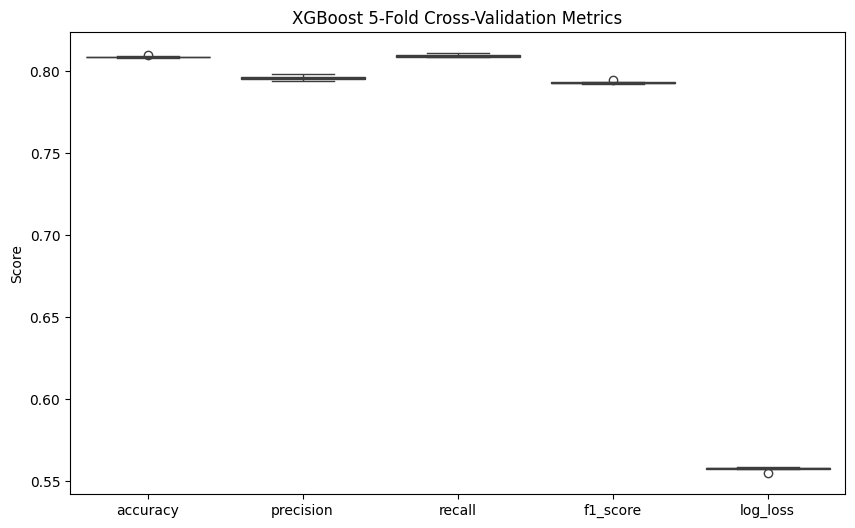

Boxplot saved to XGBoostCV.png


In [ ]:
# Edit Here

x_train = x_train
y_train = y_train
train_id = train_id

x_test = x_test
y_test = y_test
test_id = test_id

def make_unique_column_names(df):
    """
    Makes the column names in the DataFrame unique by appending a suffix to duplicates.

    Parameters:
    df (pd.DataFrame): Input DataFrame with potentially duplicate column names.

    Returns:
    pd.DataFrame: DataFrame with unique column names.
    """
    cols = pd.Series(df.columns)
    for dup in cols[cols.duplicated()].unique():  # Check for duplicates
        cols[cols[cols == dup].index.values.tolist()] = [dup + '_' + str(i) if i != 0 else dup for i in range(sum(cols == dup))]

    df.columns = cols  # Assign new unique column names
    return df

x_train = make_unique_column_names(x_train)
x_test = make_unique_column_names(x_test)

# Call the cross-validation function
results = perform_cross_validation(x_train, y_train, scoring_function)
#print(results)

# Plot the results
plot_cross_validation_results(results)

In [ ]:
# Training and Predicting

x_train = x_train
print(x_train.head())
y_train = y_train
train_id = train_id

x_test = x_test
y_test = y_test
test_id = test_id

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier  # Import XGBClassifier
from sklearn.metrics import accuracy_score

def xgboost_predict_proba(x_train, y_train, x_test):
    '''
    Trains an XGBoost classifier on the training data, outputs validation accuracy,
    and returns predicted probabilities for the test set with numeric class labels.

    Parameters:
    x_train: Training features
    y_train: Training labels (starting from 1)
    x_test: Test features for which to predict probabilities

    Returns:
    predicted_df: A DataFrame with predicted probabilities for each class (numeric labels)
    validation_accuracy: Accuracy score on the validation set
    '''

    # Adjust y_train to be 0-based for internal processing
    y_train_adjusted = y_train - 1  # Convert to 0-based indexing

    # Check the number of unique classes in y_train
    unique_classes = np.unique(y_train_adjusted)

    # If there's only one unique class or the minimum class size is 1, we cannot stratify
    if len(unique_classes) < 2 or (y_train_adjusted.value_counts() < 2).any():
        print("Not enough classes for stratification, using random train/test split.")
        stratify = None
    else:
        stratify = y_train_adjusted

    # Split the data into training and validation sets (80% train, 20% validation)
    x_train_split, x_val, y_train_split, y_val = train_test_split(
        x_train, y_train_adjusted, test_size=0.2, random_state=42, stratify=stratify
    )

    # Initialize the XGBoost model with default parameters
    xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

    # Train the model on the training split
    xgb_model.fit(x_train_split, y_train_split)

    # Predict on the validation set
    y_val_pred = xgb_model.predict(x_val)

    # Calculate validation accuracy
    validation_accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Validation Accuracy: {validation_accuracy:.4f}")

    # Predict probabilities on the test set
    y_pred_probs = xgb_model.predict_proba(x_test)

    # Create a DataFrame for predicted probabilities with numeric class labels
    num_classes = 15  # Assuming classes are from 1 to 15
    predicted_df = pd.DataFrame(0, index=np.arange(y_pred_probs.shape[0]), columns=np.arange(1, num_classes + 1))

    # Fill the DataFrame with the predicted probabilities
    for i in range(y_pred_probs.shape[1]):  # Iterate through the predicted probabilities
        predicted_df[i + 1] = y_pred_probs[:, i]  # Fill in probabilities for classes 1 to 15

    # Handle any class mismatch
    if predicted_df.shape[1] < num_classes:
        print(f"Warning: {predicted_df.shape[1]} classes found, expected {num_classes}. Imputing missing classes with zeros.")
        for cls in range(1, num_classes + 1):
            if cls not in predicted_df.columns:
                predicted_df[cls] = 0.0  # Assign zero probability to missing classes

    return predicted_df, validation_accuracy


# Call the function
y_pred_probs, validation_accuracy = xgboost_predict_proba(x_train, y_train, x_test)

if y_pred_probs is not None:
    y_pred_df = y_pred_probs.copy()
    y_pred_df.insert(0, 'Animal.ID', test_id.reset_index(drop=True))
    print(y_pred_df.head())
    y_pred_df.to_csv("XGBy_pred_df.csv", index=False)

    y_test_df = pd.DataFrame({
        'Animal.ID': test_id.reset_index(drop=True),
        'Outcome.Type': y_test.reset_index(drop=True)  # No need for inverse mapping
    })

    print(y_test_df.head())

    # Final Scoring
    print("XGBoost without PCA")
    xgboost_score = scoring_function(y_pred_df, y_test_df)

    # Convert the dictionary to a DataFrame
    xgboost_score_df = pd.DataFrame([xgboost_score])

    # Save the DataFrame to a CSV file
    xgboost_score_df.to_csv("xgboost_score.csv", index=False)
    print("XGBoost score saved to 'xgboost_score.csv'")

    Name  Animal.Type  Sex   Age  Intake.Type  Abyssinian  Affenpinscher  \
0  19560            1    1   7.0            1           0              0   
1  19560            1    1   6.0            1           0              0   
2  16845            1    1  10.0            2           0              0   
3   4665            1    1  16.0            1           0              0   
4   5095            1    2  15.0            3           0              0   

   Afghan  African  Airedale  ...  Intake.Day  Intake.Month  Intake.Year  \
0       0        0         0  ...          19            12         2014   
1       0        0         0  ...           7             3         2014   
2       0        0         0  ...           2             4         2014   
3       0        0         0  ...          16            11         2013   
4       0        0         0  ...          16            11         2013   

   Outcome.Day  Outcome.Month  Outcome.Year  Intake.Hour  Outcome.Hour  \
0           

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:33:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Validation Accuracy: 0.8062
  Animal.ID         1         2         3         4         5         6  \
0   A454956  0.884260  0.049078  0.031283  0.025171  0.000608  0.009546   
1   A478575  0.862193  0.074945  0.022524  0.032904  0.000398  0.006872   
2   A478962  0.169851  0.301635  0.325765  0.117323  0.005903  0.079065   
3   A480389  0.892367  0.048630  0.024975  0.026195  0.000255  0.007552   
4   A495162  0.139935  0.322678  0.432346  0.091151  0.006676  0.007074   

          7         8         9        10  11  12  13  14  15  
0  0.000037  0.000001  0.000012  0.000003   0   0   0   0   0  
1  0.000132  0.000002  0.000026  0.000003   0   0   0   0   0  
2  0.000015  0.000007  0.000419  0.000018   0   0   0   0   0  
3  0.000007  0.000001  0.000015  0.000002   0   0   0   0   0  
4  0.000007  0.000013  0.000077  0.000041   0   0   0   0   0  
  Animal.ID  Outcome.Type
0   A454956             1
1   A478575             1
2   A478962             3
3   A480389             1
4   A49

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
